## DLRM Profiling Experiments



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import  LineString
import shapely


### Vary Table Sizes

In [2]:
# choose one

e = 16 # kaggle
e = 64 # terabyte


In [3]:
if e == 16:
    tableSizes = [5, 10, 50, 100, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12500, 15000, 20000, 50000, 75000, 100000, 125000, 150000 ]
    
if e == 64:
    tableSizes = [5, 10, 50, 100, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12500, 15000, 20000, 50000, 75000, 100000, 125000, 150000 ]


In [4]:
string_xaxis = False

In [5]:
threads = [1,2,3,4,8]

In [6]:
## LS
 
df_ls = pd.DataFrame()
for t in threads:
    for i in tableSizes:
        if e == 16:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e16_ls__threads_'+str(t)+'_tableSize_'+str(i)+'.csv')
        elif e == 64:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e64_ls__threads_'+str(t)+'_tableSize_'+str(i)+'.csv')
        df["TableSize"] = str(i) if string_xaxis else i
        df_ls = pd.concat([df_ls,df]) 
df_ls_orig = df_ls.copy()


df_tmp = df_ls
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())

Params available
Th [1 2 3 4 5 8]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]


In [7]:
## ZT

df_zt_po = pd.DataFrame()
for i in tableSizes:
    if e == 16:
        df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e16_ztpo__tableSize_'+str(i)+'.csv')
    elif e == 64:
        df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e64_ztpo__tableSize_'+str(i)+'.csv')
    df["TableSize"] = str(i) if string_xaxis else i
    df_zt_po = pd.concat([df_zt_po,df])   
df_zt_po_orig = df_zt_po.copy()


df_tmp = df_zt_po_orig
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())

Params available
Th [1]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]


In [8]:
## ZT

df_zt_co = pd.DataFrame()
for i in tableSizes:
    if e == 16:
        df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e16_ztco__tableSize_'+str(i)+'.csv')
    elif e == 64:
        df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dlrmExt_e64_ztco__tableSize_'+str(i)+'.csv')
    df["TableSize"] = str(i) if string_xaxis else i
    df_zt_co = pd.concat([df_zt_co,df])   
df_zt_co_orig = df_zt_co.copy()


df_tmp = df_zt_co_orig
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())

Params available
Th [1]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]


In [9]:
## DHE all

df_dhe = pd.DataFrame()
for t in threads:
    for i in tableSizes:
        if e == 16:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e16_varying__threads_'+str(t)+'.csv')
        elif e == 64:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e64_varying__threads_'+str(t)+'.csv')
        df["TableSize"] = str(i) if string_xaxis else i
        df_dhe = pd.concat([df_dhe,df]) 
df_dhe_orig = df_dhe.copy()


df_tmp = df_dhe
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())
print('DheK',df_tmp['DheK'].unique())

Params available
Th [1 2 3 4 8]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]
DheK [1024  896  768  640  512  384  256  128]


In [10]:
## DHE uniform

tableSizes_dhe = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
dhek = 1024

df_dhe_uniform = pd.DataFrame()
for t in threads:
    for i in tableSizes_dhe:
        if e == 16:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e16_varying__threads_'+str(t)+'.csv')
            df = df.query('DheK == '+str(dhek))
        elif e == 64:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e64_varying__threads_'+str(t)+'.csv')
            df = df.query('DheK == '+str(dhek))
        df["TableSize"] = str(i) if string_xaxis else i
        df_dhe_uniform = pd.concat([df_dhe_uniform,df]) 
df_dhe_uniform_orig = df_dhe_uniform.copy()


df_tmp = df_dhe_uniform
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())
print('DheK',df_tmp['DheK'].unique())

Params available
Th [1 2 3 4 8]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]
DheK [1024]


In [11]:
## DHE varied

# 10000000	1024
# 1000000	896
# 100000	768
# 10000	640
# 101-1000	512
# 11-100	384
# 1-10	256

tableSizes_dheVary = [1, 1e1, 1e1, 1e2, 1e2, 1e3, 1e3, 1e4, 1e4, 1e5, 1e5, 1e6, 1e6, 1e7]
k_dheVary =        [256, 256, 384, 384, 512, 512, 640, 640, 768, 768, 896, 896, 1024, 1024]


df_dhe_vary = pd.DataFrame()
for t in threads:

    for dhek, ts in zip(k_dheVary, tableSizes_dheVary):
        if e == 16:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e16_varying__threads_'+str(t)+'.csv')
            df = df.query('DheK == '+str(dhek))
        elif e == 64:
            df = pd.read_csv('RESULTS_OUTPUT/ParsedCSVs/output_dhe_e64_varying__threads_'+str(t)+'.csv')
            df = df.query('DheK == '+str(dhek))
        df["TableSize"] = str(ts) if string_xaxis else ts

        df_dhe_vary = pd.concat([df_dhe_vary,df]) 

df_dhe_vary_orig = df_dhe_vary.copy()


df_tmp = df_dhe_vary
print('Params available')
print('Th',df_tmp['Threads'].unique())
print('B',df_tmp['BatchSize'].unique())
print('P',df_tmp['NumLookups'].unique())
print('TC',df_tmp['TableCount'].unique())
print('E',df_tmp['EmbSize'].unique())
print('DheK',df_tmp['DheK'].unique())
print('DheK',df_tmp['TableSize'].unique())

Params available
Th [1 2 3 4 8]
B [  1   8  16  32  64 128]
P [1]
TC [1 3]
E [64]
DheK [ 256  384  512  640  768  896 1024]
DheK [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]


exec config  1 1
exec config  8 1
exec config  16 1
exec config  32 1
exec config  64 1
exec config  128 1
exec config  1 2
exec config  8 2
exec config  16 2
exec config  32 2
exec config  64 2
exec config  128 2
exec config  1 3
exec config  8 3
exec config  16 3
exec config  32 3
exec config  64 3
exec config  128 3
exec config  1 4
exec config  8 4
exec config  16 4
exec config  32 4
exec config  64 4


/tmp/ipykernel_1248747/933306900.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots(1, 1, figsize=(2.5,4)) # PAPER


exec config  128 4
exec config  1 8
exec config  8 8
exec config  16 8
exec config  32 8
exec config  64 8
exec config  128 8


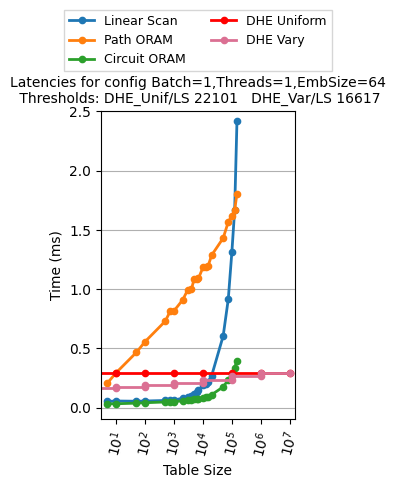

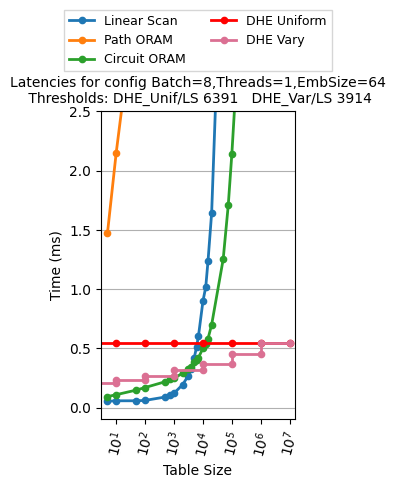

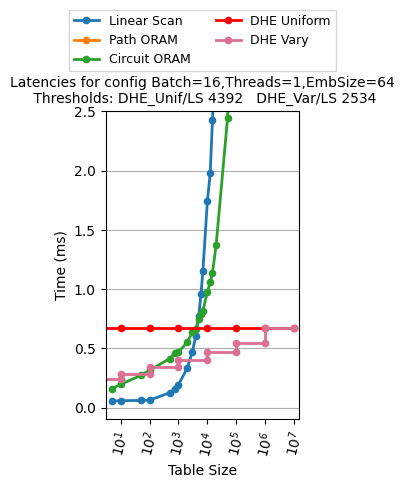

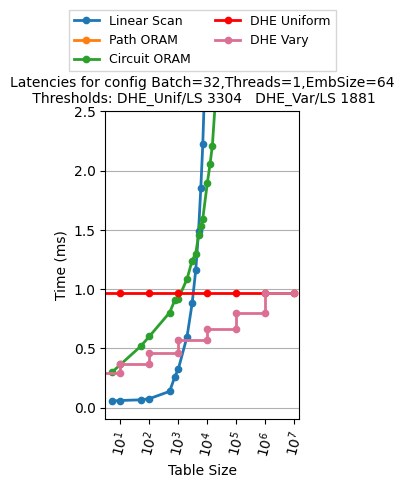

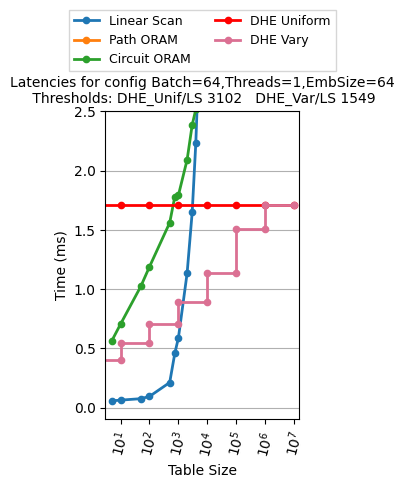

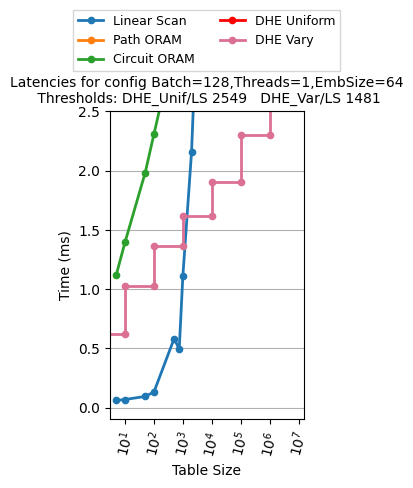

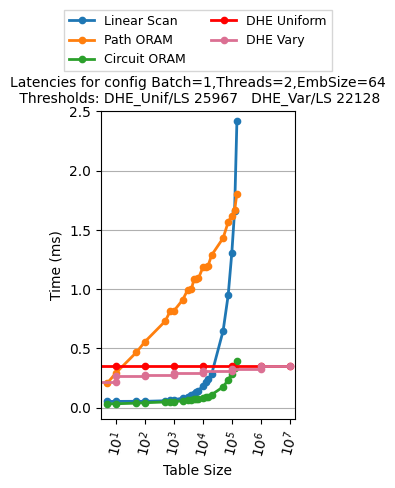

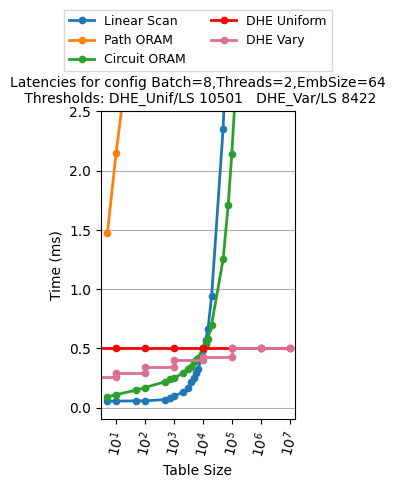

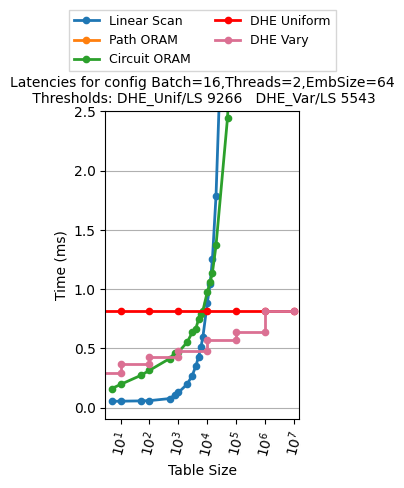

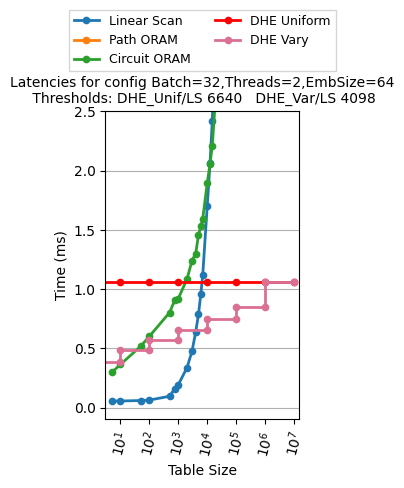

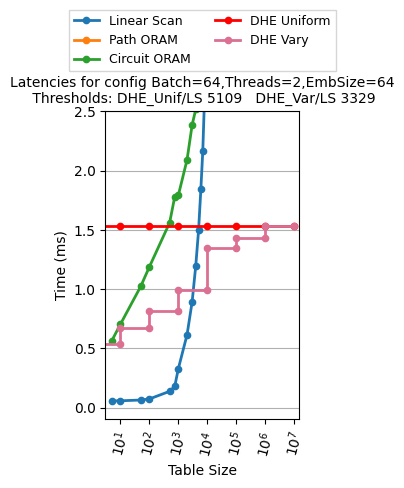

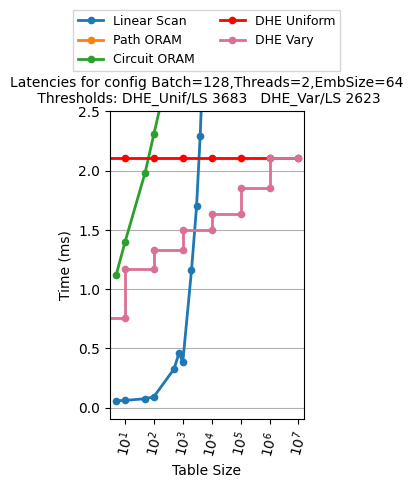

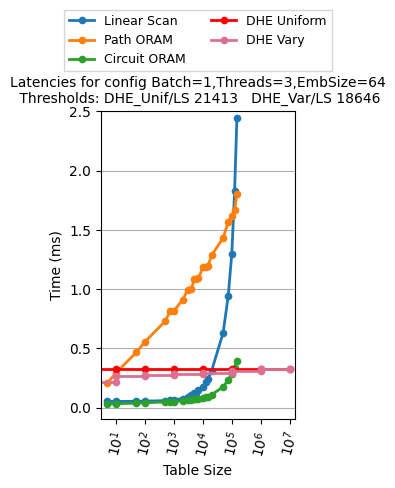

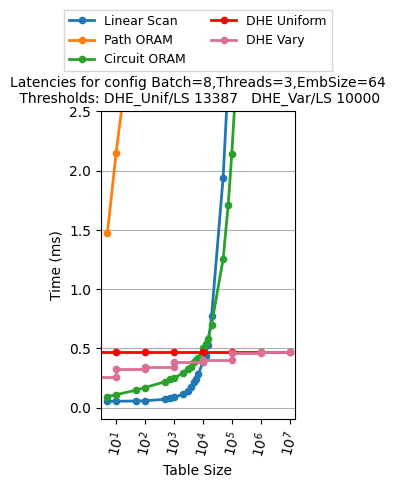

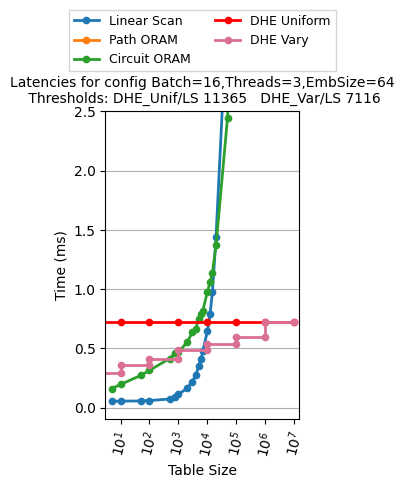

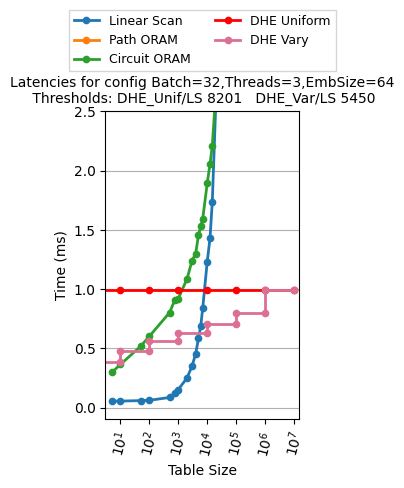

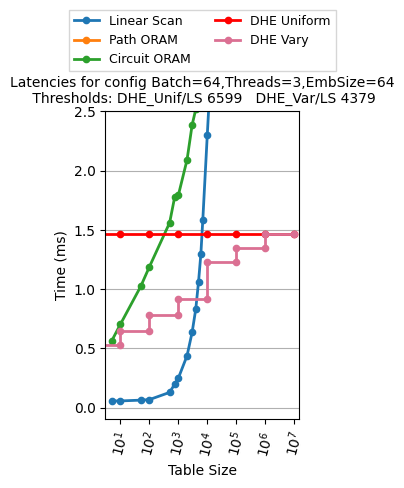

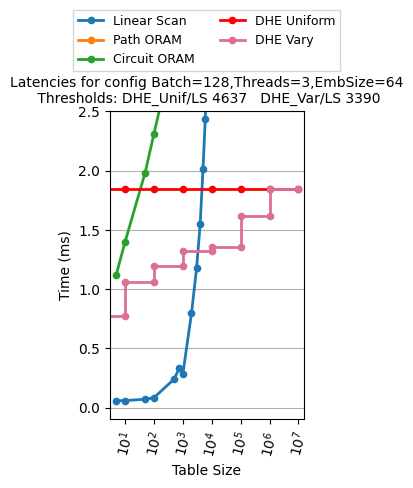

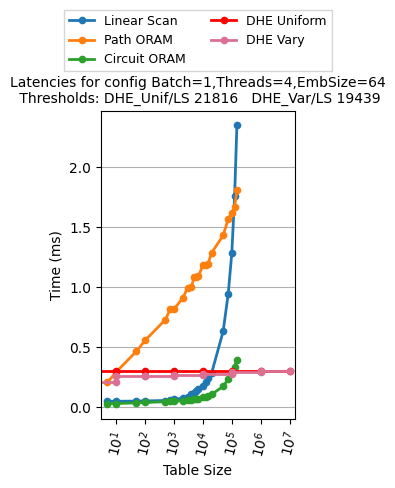

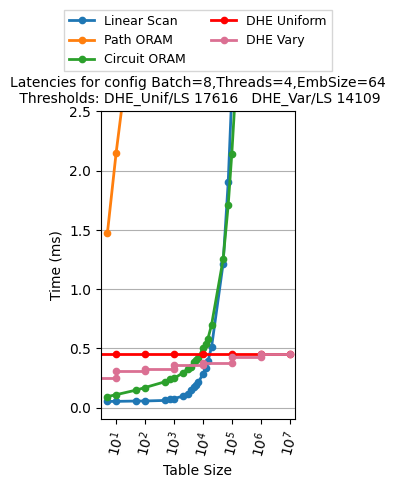

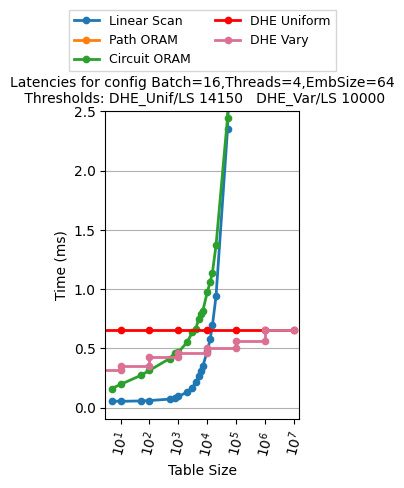

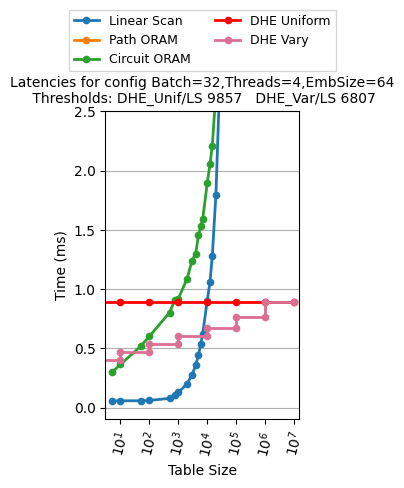

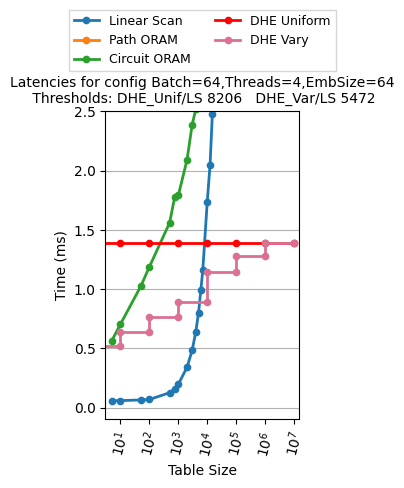

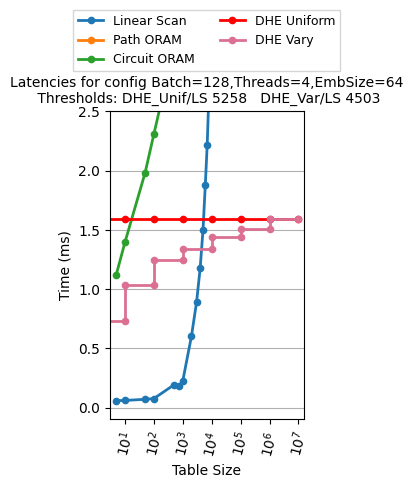

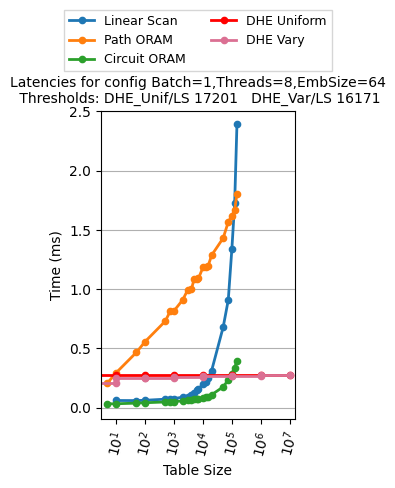

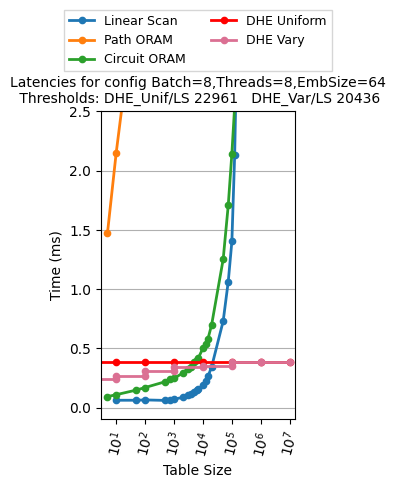

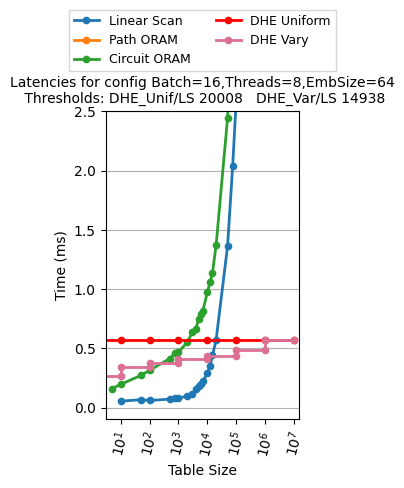

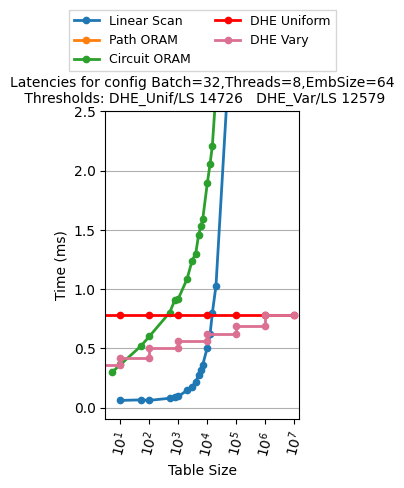

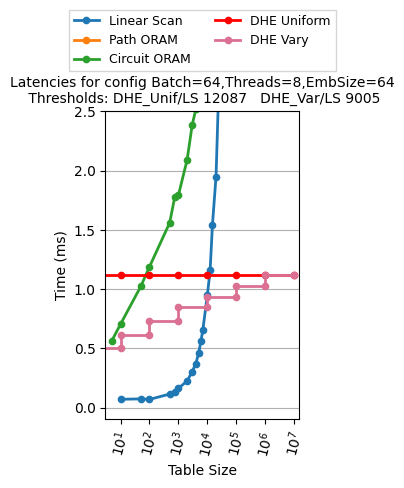

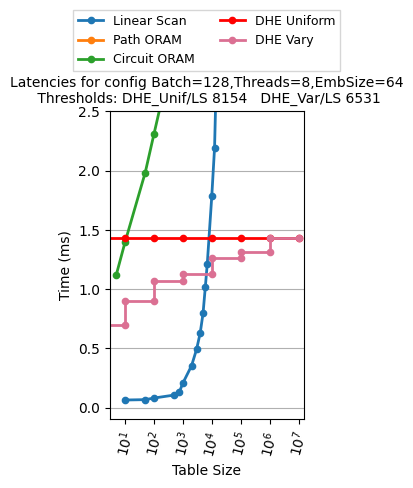

In [12]:
import csv
out_path = "thresholds_sgx_" + ("e16" if e==16 else "e64") + ".csv"
output_data_file = open(out_path, 'w', newline='')
writer = csv.writer(output_data_file)
csv_row_titles = ["tc","b","p","th","ts1","ts2"]
writer.writerow(csv_row_titles)





for tc in [1]:
 for th_ in [1,2,3,4,8]:
  for b in [1,8,16,32,64,128]:
   for p in [1]:

        print('exec config ', b, th_)

        df_dhe = df_dhe_orig.copy()
        df_dhe = df_dhe.query('TableCount == '+str(tc))
        df_dhe = df_dhe.query('BatchSize == '+str(b))
        df_dhe = df_dhe.query('Threads == '+str(th_))
        df_dhe = df_dhe.query('NumLookups == '+str(p))
        dhek = 1024
        df_dhe_1024 = df_dhe.query('DheK == '+str(dhek))
        dhek = 512
        df_dhe_2048 = df_dhe.query('DheK == '+str(dhek))

        dhe_kList = [1024, 896, 768, 640, 512, 384, 256, 128]
        df_dhe_kList = {}
        for kk in dhe_kList:
           df_dhe_kList[kk] = df_dhe.query('DheK == '+str(kk))
        
                
        df_dhe_vary = df_dhe_vary_orig.copy()
        df_dhe_vary = df_dhe_vary.query('TableCount == '+str(tc))
        df_dhe_vary = df_dhe_vary.query('BatchSize == '+str(b))
        df_dhe_vary = df_dhe_vary.query('Threads == '+str(th_))
        df_dhe_vary = df_dhe_vary.query('NumLookups == '+str(p))

        df_dhe_uniform = df_dhe_uniform_orig.copy()
        df_dhe_uniform = df_dhe_uniform.query('TableCount == '+str(tc))
        df_dhe_uniform = df_dhe_uniform.query('BatchSize == '+str(b))
        df_dhe_uniform = df_dhe_uniform.query('Threads == '+str(th_))
        df_dhe_uniform = df_dhe_uniform.query('NumLookups == '+str(p))



        df_ls = df_ls_orig.copy()
        df_ls = df_ls.query('TableCount == '+str(tc))
        df_ls = df_ls.query('BatchSize == '+str(b))
        df_ls = df_ls.query('Threads == '+str(th_))
        df_ls = df_ls.query('NumLookups == '+str(p))


        df_zt_po = df_zt_po_orig.copy()
        df_zt_po = df_zt_po.query('TableCount == '+str(tc))
        df_zt_po = df_zt_po.query('BatchSize == '+str(b))
        # df_zt_po = df_zt_po.query('Threads == '+str(th_)) # thread does not matter for ZT
        df_zt_po = df_zt_po.query('NumLookups == '+str(p))
        df_zt_po = df_zt_po.query('EmbSize == '+str(e))

        df_zt_co = df_zt_co_orig.copy()
        df_zt_co = df_zt_co.query('TableCount == '+str(tc))
        df_zt_co = df_zt_co.query('BatchSize == '+str(b))
        # df_zt_co = df_zt_co.query('Threads == '+str(th_))
        df_zt_co = df_zt_co.query('NumLookups == '+str(p))
        df_zt_co = df_zt_co.query('EmbSize == '+str(e))

        fig1, ax1 = plt.subplots(1, 1, figsize=(2.5,4)) # PAPER


        
        ax1.plot(df_ls["TableSize"], df_ls["TimeEmb"], marker='.',mew=2, ms=7, label='Linear Scan', linewidth=2);
        
        ax1.plot(df_zt_po["TableSize"], df_zt_po["TimeEmb"], marker='.',mew=2, ms=7, label='Path ORAM', linewidth=2); 
        ax1.plot(df_zt_co["TableSize"], df_zt_co["TimeEmb"], marker='.',mew=2, ms=7, label='Circuit ORAM', linewidth=2); 

        ax1.plot(df_dhe_uniform["TableSize"], df_dhe_uniform["TimeEmb"], marker='.',mew=2, ms=7, label='DHE Uniform', linewidth=2, color='red');
        ax1.plot(df_dhe_vary["TableSize"], df_dhe_vary["TimeEmb"], marker='.',mew=2, ms=7, label='DHE Vary', linewidth=2, color='palevioletred');



        # Threshold calculation

        ts1=-1
        ts2=-1

        if 1:
          x1=df_ls["TableSize"]
          x2=df_dhe_uniform["TableSize"]
          x3=df_dhe_vary["TableSize"]
          y1=df_ls["TimeEmb"]
          y2=df_dhe_uniform["TimeEmb"]
          y3=df_dhe_vary["TimeEmb"]
          line_1 = LineString(np.column_stack((x1, y1)))
          line_2 = LineString(np.column_stack((x2, y2)))
          line_3 = LineString(np.column_stack((x3, y3)))
          intersection1 = line_1.intersection(line_2)
          intersection2 = line_1.intersection(line_3)
          # print(intersection1, intersection2)
          # print(type(intersection1))
          if type(intersection1)==shapely.geometry.multipoint.MultiPoint:
            intersection1 = intersection1.geoms[0]
          if type(intersection2)==shapely.geometry.multipoint.MultiPoint:
            intersection2 = intersection2.geoms[0]
          # print(intersection1, intersection2)
          if len(intersection1.xy[0])>0:
              ts1=round(intersection1.xy[0][0])
          if len(intersection2.xy[0])>0:
              ts2=round(intersection2.xy[0][0])
          writer.writerow([tc,b,p,th_,ts1,ts2])
          output_data_file.flush()





        ax1.set_xlabel("Table Size");        
        ax1.set_ylabel("Time (ms)");

        if 1:
          ax1.set_title("Latencies for config Batch="+str(b)+",Threads="+str(th_)+",EmbSize="+str(e)     +"\n Thresholds: DHE_Unif/LS " + str(ts1)+ "   DHE_Var/LS " +str(ts2)  );
        

        ax1.legend(fontsize = 9, loc = "upper left");
        ax1.legend(fontsize = 9, loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=False, shadow=False, ncol=2)
        
        ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=75, ha='center');
        
        for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label,] + ax1.get_xticklabels() + ax1.get_yticklabels()):
            item.set_fontsize(10)

        ax1.set_xscale('log');
            
        ax1.grid(axis = 'y')
        # ax1.grid(axis = 'x')
        
        aaa,bbb = ax1.get_ylim()
        y_max = 2.5 if e == 16 else    2.5 # if 64
        ax1.set_ylim(-.1 , min(y_max,bbb))
        

        ax1.set_xlim(3,1e7+5e6)


        if 1:
          if e == 16:
              ax1.set_xticks([1e1,1e2,1e3,1e4,1e5,1e6,1e7]) 
          if e == 64:
              ax1.set_xticks([1e1,1e2,1e3,1e4,1e5,1e6,1e7]) 


In [13]:
output_data_file.close()